In [ ]:
# Tranfer learning 基于tranfer_data 建立MLP模式，实现数据迁移学习
# 实现y的预测，可视化结果
# 基于新数据tranfer_data2对模型进行二次训练对比表现
# 模型结构 MLP，两个隐藏层，每层50个神经元，激活函数relu,输出层激活函数linear,迭代次数100


In [1]:
# load the data 
import pandas as pd
data = pd.read_csv('./data/Transfer_Learning/tranfer_data.csv')
data.head()

,x,y
0,-5.0,25.00
1,-4.9,24.01
2,-4.8,23.04
3,-4.7,22.09
4,-4.6,21.16


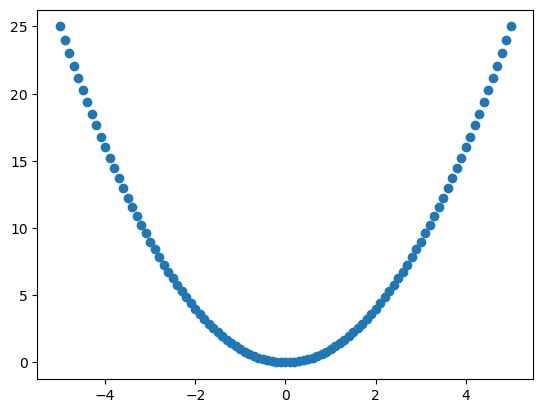

In [2]:
# visulize the data
x = data.loc[:,'x']
y = data.loc[:,'y']

from matplotlib import pyplot as plt
fig = plt.figure()
plt.scatter(x,y)
plt.show()

In [3]:
import numpy as np
x = np.array(x).reshape(-1,1)
print(x.shape,y.shape)

(101, 1) (101,)


In [4]:
# establish the MLP model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=50, input_dim = 1, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.summary()

/opt/anaconda3/envs/AI/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# train the data
model.fit(x,y,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 128.2513  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 123.6821
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119.2327
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 115.1716
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111.3871
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108.0003
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 104.4084
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100.7803
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 96.8081
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92.9220 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 88.8205
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 84.6432 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 80.2398
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75.4977
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70.9292
Epoch 1

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


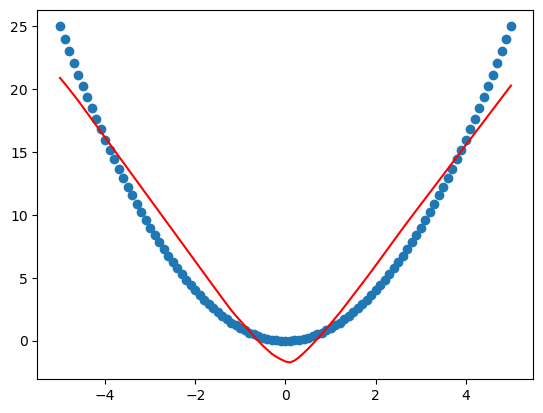

In [6]:
# visulize the prediction epooch =100
y_predict = model.predict(x)
fig1 = plt.figure()
plt.scatter(x,y)
plt.plot(x,y_predict,'r')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


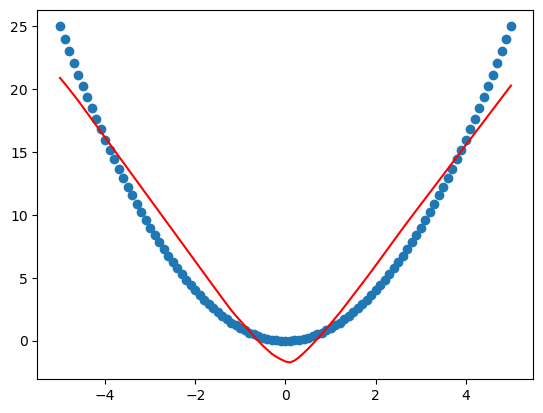

In [7]:
# visulize the prediction epooch =200
y_predict = model.predict(x)
fig2 = plt.figure()
plt.scatter(x,y)
plt.plot(x,y_predict,'r')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


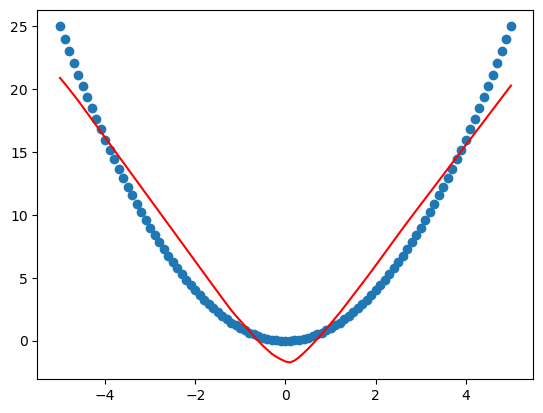

In [8]:
# visulize the prediction epooch =300
y_predict = model.predict(x)
fig3 = plt.figure()
plt.scatter(x,y)
plt.plot(x,y_predict,'r')
plt.show()

In [9]:
# save the model
import joblib
joblib.dump(model, './model/model_MLP.joblib')

['./model/model_MLP.joblib']

In [10]:
import os
current_dir = os.getcwd()
print(f"当前工作目录: {current_dir}")
#file_path ='C:/Users/00036777/AI test project/model_MLP.joblib'

当前工作目录: /Users/Bo/Project/AI_Projects/01 Basic_Learning_Tsinghua


In [11]:
# load the model and data
model1 = joblib.load('./model/model_MLP.joblib')
#model1 = model
data2 = pd.read_csv('./data/Transfer_Learning/tranfer_data2.csv')
data2.head()

,x,y
0,-5.0,25.00
1,-4.9,24.21
2,-4.8,23.44
3,-4.7,22.69
4,-4.6,21.96


In [12]:
# transfer learning
x2 = data2.loc[:,'x']
y2 = data2.loc[:,'y']
x2 = np.array(x2).reshape(-1,1)
print(x2.shape,y2.shape)
model1.fit(x2,y2,epochs=30)

(101, 1) (101,)
Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 128.0728  
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 102.6010
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74.9240
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48.4728
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.0306
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.4937
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.7553
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.3475
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.8402
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.9817
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.4636
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.9534
Epoch 13/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.2237
Epoch 14/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8421
Epoch 15/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6537 
Epoch 16/30
4/4

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


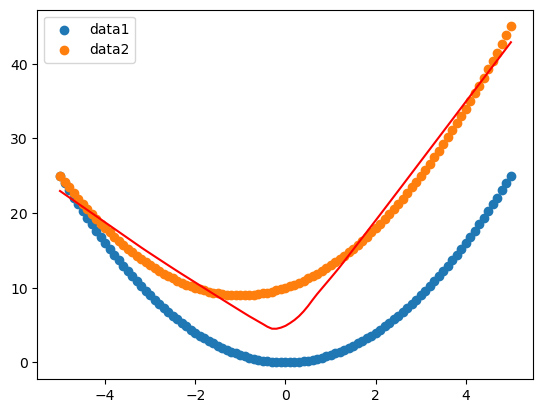

In [13]:
# visulize the prediction epooch =10
y2_predict = model1.predict(x2)
fig4 = plt.figure()
plt.scatter(x,y, label = 'data1')
plt.scatter(x2,y2, label = 'data2')
plt.plot(x,y2_predict,'r')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


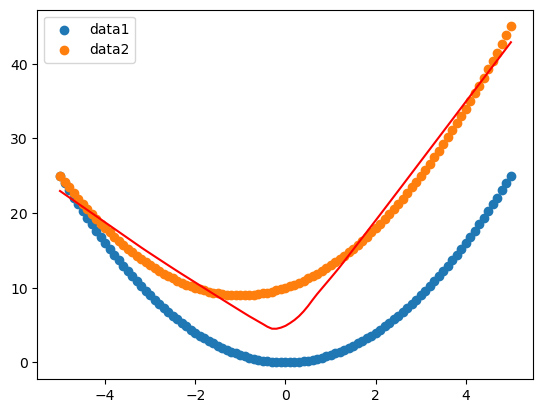

In [14]:
# visulize the prediction epooch =20
y2_predict = model1.predict(x2)
fig5 = plt.figure()
plt.scatter(x,y, label = 'data1')
plt.scatter(x2,y2, label = 'data2')
plt.plot(x,y2_predict,'r')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


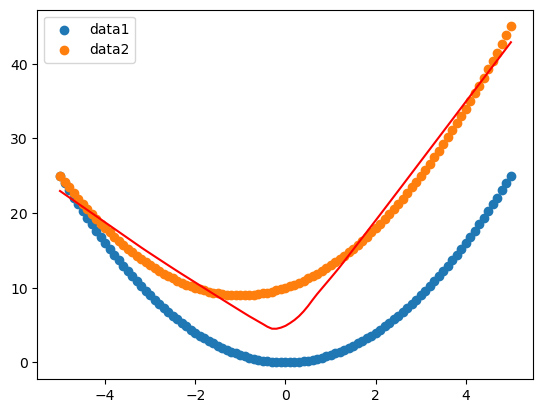

In [15]:
# visulize the prediction epooch =30
y2_predict = model1.predict(x2)
fig6 = plt.figure()
plt.scatter(x,y, label = 'data1')
plt.scatter(x2,y2, label = 'data2')
plt.plot(x,y2_predict,'r')
plt.legend()
plt.show()